In [58]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import string
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, GRU
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models import Word2Vec

In [2]:
# Get the Training Data

data = []

with open('../input/train.txt', 'r') as fl:
    for line in fl.readlines():
        line = line.lower()
        line = line.replace('<br />', '')
        line = line.translate(str.maketrans('', '', string.punctuation))
        line_arr = line.split()
        data.append(line_arr)
        
assert(len(data) == 25000)

Y = np.zeros(25000)
Y[:12500] = 1

In [3]:
# Shuffle the Dataset

indices = np.arange(0, 25000)
np.random.shuffle(indices)

data = [data[idx] for idx in indices]
Y = [Y[idx] for idx in indices]

In [4]:
# Split the dataset into train and validation

data_train = data[:20000]
Y_train = np.array(Y[:20000])

data_val = data[20000:]
Y_val = np.array(Y[20000:])

In [5]:
# Helper Functions

def plot_loss(arr):

    plt.plot(arr)
    plt.xlabel("num iters")
    plt.ylabel("loss")
    plt.title("loss vs iters")
    plt.show()

def plot_acc(arr):

    plt.plot(arr)
    plt.xlabel("num iters")
    plt.ylabel("accuracy")
    plt.title("accuracy vs iters")
    plt.show()

# Models

## Model 1

In [6]:
# Getting the integer encoding of words

word2ind = {'<pd>' : 0}
ind2word = ['<pd>']

for line_arr in data:
    for word in line_arr:
        if word not in word2ind:
            word2ind[word] = len(ind2word)
            ind2word.append(word)
            
num_words = len(ind2word)

In [7]:
# Converting the training and validation data into integer-coding form

X_train = []

for line_arr in data_train:
    arr = []
    for word in line_arr:
        arr.append(word2ind[word])
    
    X_train.append(arr)

    
X_val = []

for line_arr in data_val:
    arr = []
    for word in line_arr:
        arr.append(word2ind[word])
    
    X_val.append(arr)

In [8]:
# Pad all sequences with 0's

X_train = pad_sequences(X_train, maxlen = 200)
X_val = pad_sequences(X_val, maxlen = 200)

In [25]:
model = tf.keras.Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=200),
    SimpleRNN(200, activation='tanh'),
    Dense(1, activation='sigmoid')
])

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [27]:
hist = model.fit(X_train, Y_train, batch_size = 512, epochs = 20, verbose=2)

Train on 20000 samples
Epoch 1/20
20000/20000 - 21s - loss: 0.6892 - acc: 0.5339
Epoch 2/20
20000/20000 - 19s - loss: 0.6148 - acc: 0.7157
Epoch 3/20
20000/20000 - 19s - loss: 0.4104 - acc: 0.8242
Epoch 4/20
20000/20000 - 19s - loss: 0.1444 - acc: 0.9556
Epoch 5/20
20000/20000 - 18s - loss: 0.6199 - acc: 0.7297
Epoch 6/20
20000/20000 - 18s - loss: 0.5471 - acc: 0.7146
Epoch 7/20
20000/20000 - 18s - loss: 0.4556 - acc: 0.7966
Epoch 8/20
20000/20000 - 18s - loss: 0.4003 - acc: 0.8274
Epoch 9/20
20000/20000 - 18s - loss: 0.3265 - acc: 0.8643
Epoch 10/20
20000/20000 - 18s - loss: 0.2365 - acc: 0.9039
Epoch 11/20
20000/20000 - 18s - loss: 0.1472 - acc: 0.9491
Epoch 12/20
20000/20000 - 18s - loss: 0.0878 - acc: 0.9732
Epoch 13/20
20000/20000 - 18s - loss: 0.0523 - acc: 0.9853
Epoch 14/20
20000/20000 - 19s - loss: 0.0357 - acc: 0.9908
Epoch 15/20
20000/20000 - 18s - loss: 0.0276 - acc: 0.9934
Epoch 16/20
20000/20000 - 18s - loss: 0.0284 - acc: 0.9923
Epoch 17/20
20000/20000 - 18s - loss: 0.02

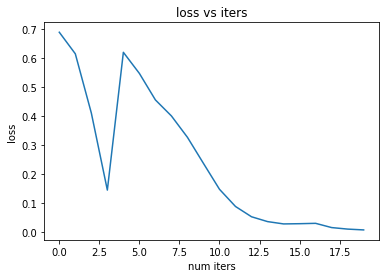

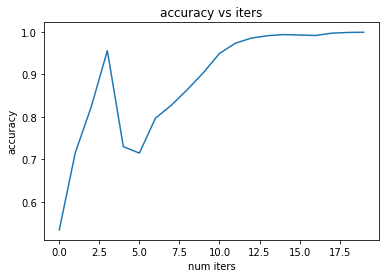

In [28]:
plot_loss(hist.history['loss'])
plot_acc(hist.history['acc'])

In [29]:
val_loss, val_acc = model.evaluate(X_val, Y_val, verbose=2)
print("Validation Loss: ", val_loss)
print("Validation Acc : ", val_acc)

5000/1 - 10s - loss: 0.3984 - acc: 0.8124
Validation Loss:  0.7905839220769704
Validation Acc :  0.8124


## Model 2

In [30]:
model = keras.Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=200),
    LSTM(200, activation='tanh'),
    Dense(1, activation='sigmoid')
])

In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [32]:
hist = model.fit(X_train, Y_train, batch_size = 512, epochs = 20, verbose=2)

Train on 20000 samples
Epoch 1/20
20000/20000 - 18s - loss: 0.6106 - acc: 0.6769
Epoch 2/20
20000/20000 - 16s - loss: 0.3152 - acc: 0.8733
Epoch 3/20
20000/20000 - 15s - loss: 0.1368 - acc: 0.9535
Epoch 4/20
20000/20000 - 15s - loss: 0.0736 - acc: 0.9787
Epoch 5/20
20000/20000 - 15s - loss: 0.0324 - acc: 0.9924
Epoch 6/20
20000/20000 - 15s - loss: 0.0137 - acc: 0.9969
Epoch 7/20
20000/20000 - 15s - loss: 0.1127 - acc: 0.9635
Epoch 8/20
20000/20000 - 15s - loss: 0.0181 - acc: 0.9945
Epoch 9/20
20000/20000 - 15s - loss: 0.0233 - acc: 0.9931
Epoch 10/20
20000/20000 - 15s - loss: 0.0051 - acc: 0.9990
Epoch 11/20
20000/20000 - 15s - loss: 0.0013 - acc: 0.9998
Epoch 12/20
20000/20000 - 15s - loss: 4.9833e-04 - acc: 0.9999
Epoch 13/20
20000/20000 - 15s - loss: 3.2142e-04 - acc: 1.0000
Epoch 14/20
20000/20000 - 15s - loss: 2.4036e-04 - acc: 1.0000
Epoch 15/20
20000/20000 - 15s - loss: 1.9010e-04 - acc: 1.0000
Epoch 16/20
20000/20000 - 15s - loss: 1.5591e-04 - acc: 1.0000
Epoch 17/20
20000/2000

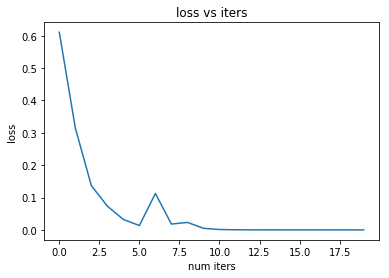

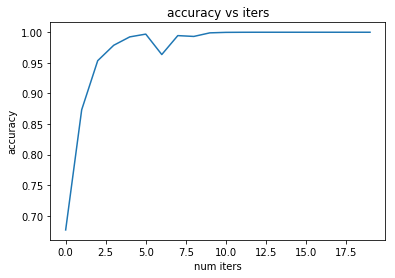

In [33]:
plot_loss(hist.history['loss'])
plot_acc(hist.history['acc'])

In [34]:
val_loss, val_acc = model.evaluate(X_val, Y_val, verbose=2)
print("Validation Loss: ", val_loss)
print("Validation Acc : ", val_acc)

5000/1 - 9s - loss: 0.8290 - acc: 0.8582
Validation Loss:  0.8647316823519766
Validation Acc :  0.8582


## Model 3

In [35]:
model = keras.Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=200),
    GRU(200, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [36]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [37]:
hist = model.fit(X_train, Y_train, batch_size = 512, epochs = 20, verbose=2)

Train on 20000 samples
Epoch 1/20
20000/20000 - 25s - loss: 22.8039 - acc: 0.5939
Epoch 2/20
20000/20000 - 23s - loss: 237.6783 - acc: 0.6187
Epoch 3/20
20000/20000 - 23s - loss: 0.6244 - acc: 0.7131
Epoch 4/20
20000/20000 - 23s - loss: 0.6128 - acc: 0.7398
Epoch 5/20
20000/20000 - 23s - loss: 0.6017 - acc: 0.7588
Epoch 6/20
20000/20000 - 23s - loss: 0.5908 - acc: 0.7755
Epoch 7/20
20000/20000 - 23s - loss: 0.5801 - acc: 0.7859
Epoch 8/20
20000/20000 - 24s - loss: 0.5696 - acc: 0.7934
Epoch 9/20
20000/20000 - 23s - loss: 0.5589 - acc: 0.8000
Epoch 10/20
20000/20000 - 23s - loss: 0.5484 - acc: 0.8061
Epoch 11/20
20000/20000 - 23s - loss: 0.5380 - acc: 0.8109
Epoch 12/20
20000/20000 - 23s - loss: 0.5277 - acc: 0.8142
Epoch 13/20
20000/20000 - 23s - loss: 0.5177 - acc: 0.8188
Epoch 14/20
20000/20000 - 23s - loss: 0.5080 - acc: 0.8221
Epoch 15/20
20000/20000 - 23s - loss: 0.4986 - acc: 0.8252
Epoch 16/20
20000/20000 - 23s - loss: 0.4895 - acc: 0.8284
Epoch 17/20
20000/20000 - 23s - loss: 0

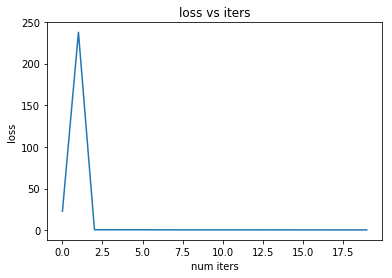

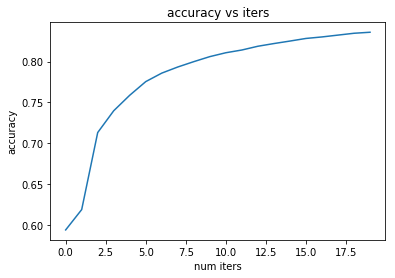

In [38]:
plot_loss(hist.history['loss'])
plot_acc(hist.history['acc'])

In [39]:
val_loss, val_acc = model.evaluate(X_val, Y_val, verbose=2)
print("Validation Loss: ", val_loss)
print("Validation Acc : ", val_acc)

5000/1 - 23s - loss: 0.6330 - acc: 0.6640
Validation Loss:  0.620153230381012
Validation Acc :  0.664


## Model4

In [48]:
model = keras.Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=200),
    LSTM(200, activation='tanh', return_sequences=True),
    LSTM(200, activation='tanh'),
    Dense(1, activation='sigmoid')
])

In [49]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [50]:
hist = model.fit(X_train, Y_train, batch_size = 512, epochs = 20, verbose=2)

Train on 20000 samples
Epoch 1/20
20000/20000 - 21s - loss: 0.5677 - acc: 0.7013
Epoch 2/20
20000/20000 - 17s - loss: 0.2597 - acc: 0.9003
Epoch 3/20
20000/20000 - 17s - loss: 0.1401 - acc: 0.9526
Epoch 4/20
20000/20000 - 17s - loss: 0.0613 - acc: 0.9825
Epoch 5/20
20000/20000 - 17s - loss: 0.0189 - acc: 0.9954
Epoch 6/20
20000/20000 - 17s - loss: 0.0075 - acc: 0.9985
Epoch 7/20
20000/20000 - 17s - loss: 0.0039 - acc: 0.9990
Epoch 8/20
20000/20000 - 17s - loss: 0.0033 - acc: 0.9990
Epoch 9/20
20000/20000 - 17s - loss: 0.0028 - acc: 0.9990
Epoch 10/20
20000/20000 - 17s - loss: 0.0486 - acc: 0.9828
Epoch 11/20
20000/20000 - 17s - loss: 0.0439 - acc: 0.9858
Epoch 12/20
20000/20000 - 17s - loss: 0.0346 - acc: 0.9886
Epoch 13/20
20000/20000 - 17s - loss: 0.0077 - acc: 0.9976
Epoch 14/20
20000/20000 - 17s - loss: 0.0013 - acc: 0.9998
Epoch 15/20
20000/20000 - 17s - loss: 0.0018 - acc: 0.9995
Epoch 16/20
20000/20000 - 17s - loss: 7.8590e-04 - acc: 0.9998
Epoch 17/20
20000/20000 - 17s - loss: 

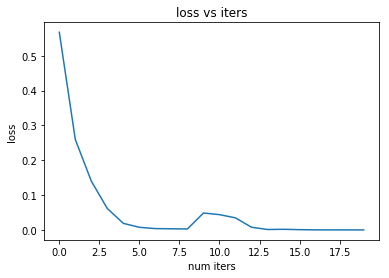

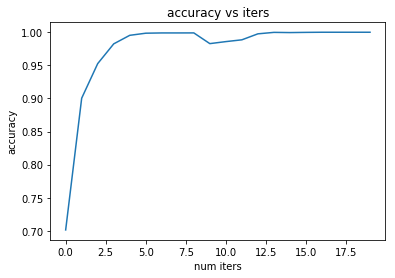

In [51]:
plot_loss(hist.history['loss'])
plot_acc(hist.history['acc'])

In [52]:
val_loss, val_acc = model.evaluate(X_val, Y_val, verbose=2)
print("Validation Loss: ", val_loss)
print("Validation Acc : ", val_acc)

5000/1 - 11s - loss: 0.6852 - acc: 0.8420
Validation Loss:  1.124303325688839
Validation Acc :  0.842


## Model 5

In [53]:
model = keras.Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=200),
    LSTM(200, activation='tanh', return_sequences=True),
    LSTM(200, activation='tanh', return_sequences=True),
    LSTM(200, activation='tanh'),
    Dense(1, activation='sigmoid')
])

In [54]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [55]:
hist = model.fit(X_train, Y_train, batch_size = 512, epochs = 20, verbose=2)

Train on 20000 samples
Epoch 1/20
20000/20000 - 24s - loss: 0.6747 - acc: 0.6184
Epoch 2/20
20000/20000 - 19s - loss: 0.3447 - acc: 0.8546
Epoch 3/20
20000/20000 - 20s - loss: 0.1208 - acc: 0.9577
Epoch 4/20
20000/20000 - 19s - loss: 0.0512 - acc: 0.9844
Epoch 5/20
20000/20000 - 19s - loss: 0.0201 - acc: 0.9943
Epoch 6/20
20000/20000 - 19s - loss: 0.0202 - acc: 0.9940
Epoch 7/20
20000/20000 - 19s - loss: 0.0087 - acc: 0.9970
Epoch 8/20
20000/20000 - 19s - loss: 0.0075 - acc: 0.9975
Epoch 9/20
20000/20000 - 19s - loss: 0.0085 - acc: 0.9963
Epoch 10/20
20000/20000 - 19s - loss: 0.0059 - acc: 0.9984
Epoch 11/20
20000/20000 - 19s - loss: 0.0051 - acc: 0.9983
Epoch 12/20
20000/20000 - 19s - loss: 0.0022 - acc: 0.9995
Epoch 13/20
20000/20000 - 19s - loss: 0.0027 - acc: 0.9990
Epoch 14/20
20000/20000 - 19s - loss: 0.0068 - acc: 0.9975
Epoch 15/20
20000/20000 - 19s - loss: 0.0129 - acc: 0.9959
Epoch 16/20
20000/20000 - 19s - loss: 0.0078 - acc: 0.9974
Epoch 17/20
20000/20000 - 19s - loss: 0.00

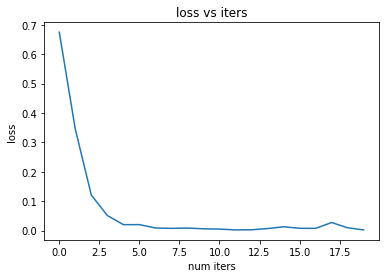

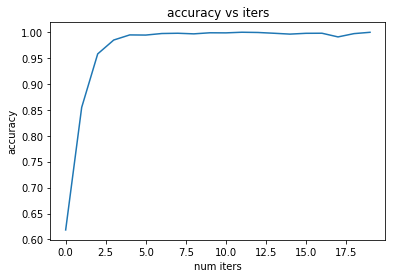

In [56]:
plot_loss(hist.history['loss'])
plot_acc(hist.history['acc'])

In [57]:
val_loss, val_acc = model.evaluate(X_val, Y_val, verbose=2)
print("Validation Loss: ", val_loss)
print("Validation Acc : ", val_acc)

5000/1 - 11s - loss: 1.1544 - acc: 0.8400
Validation Loss:  0.9993465023517608
Validation Acc :  0.84


## Model 6

In [63]:
sentence_data = []

for line_arr in data:
    sentence_data.append(" ".join(line_arr))

In [66]:
w2v_model = Word2Vec(data, size = 128, window = 5, min_count=0)
word2vec = w2v_model.wv

In [75]:
# Converting the training and validation data into vector-coding form using word2vec

X_train_vec = []

for line_arr in data_train:
    arr = []
    for word in line_arr:
        arr.append(word2vec[word])
    
    X_train_vec.append(arr)

    
X_val_vec = []

for line_arr in data_val:
    arr = []
    for word in line_arr:
        arr.append(word2vec[word])
    
    X_val_vec.append(arr)



In [76]:
# Pad all sequences with 0's

X_train_vec = pad_sequences(X_train_vec, maxlen = 200, value = np.zeros(128))
X_val_vec = pad_sequences(X_val_vec, maxlen = 200, value = np.zeros(128))

In [85]:
model = keras.Sequential([
    LSTM(200, activation='tanh', input_shape = (200, 128)),
    Dense(1, activation='sigmoid')
])

In [86]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [87]:
hist = model.fit(X_train_vec, Y_train, batch_size = 512, epochs = 20, verbose=2)

Train on 20000 samples
Epoch 1/20
20000/20000 - 5s - loss: 0.5567 - acc: 0.7049
Epoch 2/20
20000/20000 - 3s - loss: 0.4581 - acc: 0.7870
Epoch 3/20
20000/20000 - 3s - loss: 0.4218 - acc: 0.8118
Epoch 4/20
20000/20000 - 3s - loss: 0.3940 - acc: 0.8255
Epoch 5/20
20000/20000 - 3s - loss: 0.3916 - acc: 0.8295
Epoch 6/20
20000/20000 - 3s - loss: 0.3870 - acc: 0.8298
Epoch 7/20
20000/20000 - 3s - loss: 0.3510 - acc: 0.8505
Epoch 8/20
20000/20000 - 3s - loss: 0.3248 - acc: 0.8626
Epoch 9/20
20000/20000 - 3s - loss: 0.3115 - acc: 0.8685
Epoch 10/20
20000/20000 - 3s - loss: 0.2896 - acc: 0.8812
Epoch 11/20
20000/20000 - 3s - loss: 0.2777 - acc: 0.8840
Epoch 12/20
20000/20000 - 3s - loss: 0.2741 - acc: 0.8864
Epoch 13/20
20000/20000 - 3s - loss: 0.2487 - acc: 0.8999
Epoch 14/20
20000/20000 - 3s - loss: 0.2256 - acc: 0.9122
Epoch 15/20
20000/20000 - 3s - loss: 0.2164 - acc: 0.9133
Epoch 16/20
20000/20000 - 3s - loss: 0.2073 - acc: 0.9188
Epoch 17/20
20000/20000 - 3s - loss: 0.1783 - acc: 0.9298


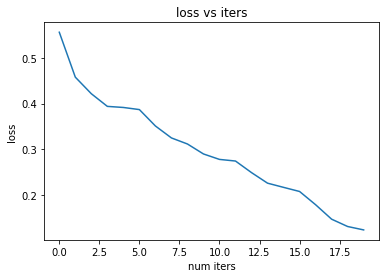

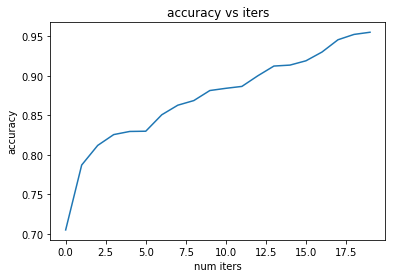

In [88]:
plot_loss(hist.history['loss'])
plot_acc(hist.history['acc'])

In [89]:
val_loss, val_acc = model.evaluate(X_val_vec, Y_val, verbose=2)
print("Validation Loss: ", val_loss)
print("Validation Acc : ", val_acc)

5000/1 - 2s - loss: 0.2814 - acc: 0.8290
Validation Loss:  0.497761126434803
Validation Acc :  0.829


# Best model

In [93]:
model = keras.Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=200),
    LSTM(200, activation='tanh'),
    Dense(1, activation='sigmoid')
])

In [94]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [95]:
_ = model.fit(X_train, Y_train, batch_size = 512, epochs = 20, verbose=0)

In [116]:
# Get the Test Data

data_test = []

with open('../input/test.txt', 'r') as fl:
    for line in fl.readlines():
        line = line.lower()
        line = line.replace('<br />', '')
        line = line.translate(str.maketrans('', '', string.punctuation))
        line_arr = line.split()
        data_test.append(line_arr)
        
assert(len(data_test) == 25000)

Y_test = np.zeros(25000)
Y_test[:12500] = 1

In [117]:
# Shuffle the Dataset

indices = np.arange(0, 25000)
np.random.shuffle(indices)

data_test = [data_test[idx] for idx in indices]
Y_test = np.array([Y_test[idx] for idx in indices])

In [118]:
# Getting the integer encoding of words

word2ind_test = {'<pd>' : 0}
ind2word_test = ['<pd>']

for line_arr in data_test:
    for word in line_arr:
        if word not in word2ind_test:
            word2ind_test[word] = len(ind2word_test)
            ind2word_test.append(word)
            
num_words_test = len(ind2word_test)

In [119]:
# Converting the training and validation data into vector-coding form using word2vec

X_test = []

for line_arr in data_test:
    arr = []
    for word in line_arr:
        arr.append(word2ind_test[word])
    
    X_test.append(arr)

In [120]:
# Pad all sequences with 0's

X_test = pad_sequences(X_test, maxlen = 200, value = 0)

In [121]:
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print("Test Loss: ", test_loss)
print("Test Acc : ", test_acc)

25000/1 - 44s - loss: 4.9366 - acc: 0.5382
Test Loss:  3.6233483587646482
Test Acc :  0.5382
